In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Number of rows and columns of input data

In [3]:
data.shape

(8807, 12)

# Find out the missing or NaN values in the dataset

In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Note:- As we can see, a lot of records in the data doesn't have values for Director, Cast and Country fields

#### We will firstly look at the distribution of how many tv shows and movies are present in netflix. Later on, we will specifically start analysing more details about the ones that fetched the best reviews

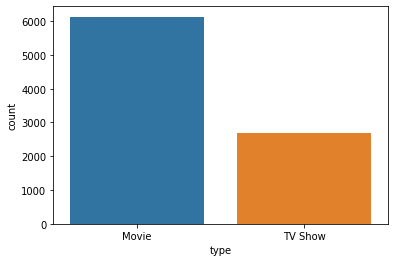

In [5]:
sns.countplot(x= 'type', data=data)
plt.show()

#### We are interested in increasing the revenue of Netflix, so our main objective is to figure out which all shows and movies performed the best.

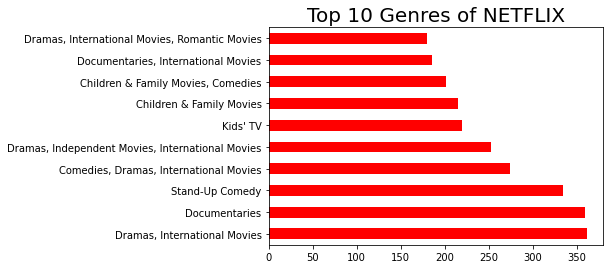

In [6]:
data["listed_in"].value_counts()[:10].plot(kind="barh", color="red")
plt.title("Top 10 Genres of NETFLIX",size=20);

##### We have a lot of movies compared to TV shows, hence the above analysis is not symmetric about movies and TV shows.we will split our data so that our analysis will not be skewed.

##### Before that, we need to clean/preprocess our data to get better insights

# Movies

In [7]:
df = data.copy()
df = df[df['type'] == 'Movie']

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


Since we don't have much values in the Director and Cast columns, we will drop them

However we cannot drop the countries as that is one of our primary attribute for this case study

In [8]:
df.drop(['director', 'cast'], axis=1, inplace=True)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [9]:
df[df['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
13,s14,Movie,Confessions of an Invisible Girl,NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
18,s19,Movie,Intrusion,NaN,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
22,s23,Movie,Avvai Shanmughi,NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
...,...,...,...,...,...,...,...,...,...,...
8585,s8586,Movie,Three-Quarters Decent,NaN,"June 20, 2019",2010,TV-14,96 min,"Comedies, Dramas, International Movies","Determined to fight corruption in his country,..."
8602,s8603,Movie,Tom and Jerry: The Magic Ring,NaN,"December 15, 2019",2001,TV-Y7,60 min,"Children & Family Movies, Comedies",When a young wizard leaves Tom to guard his pr...
8622,s8623,Movie,Tremors 2: Aftershocks,NaN,"January 1, 2020",1995,PG-13,100 min,"Comedies, Horror Movies, Sci-Fi & Fantasy",A rag-tag team of survivalists and scientists ...
8718,s8719,Movie,Westside vs. the World,NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...


##### Assuming the data might have been collected with some sequence, we will probably start imputing with forward fill method instead of using mode or mean values to impute the data.

In [10]:
df['country'] = df['country'].ffill(axis=0)
df[df['country'].isnull()]
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
# Check for null rated movies
df[df['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
7537,s7538,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [12]:
ratings = ['TV-PG', 'TV-MA']

for id, rating in zip(df[df['rating'].isnull()].index, ratings):
  df['rating'].loc[id] = rating

C:\Users\PARTHA\AppData\Local\Temp\ipykernel_3108\4109745767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'].loc[id] = rating


In [13]:
df[df['rating'].isnull()]
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [14]:
df[(df['show_id'] == 's7538') | (df['show_id'] == 's5990')]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,TV-PG,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
7537,s7538,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,TV-MA,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [15]:
# Check for where date was null
df = df[df['date_added'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   country       6131 non-null   object
 4   date_added    6131 non-null   object
 5   release_year  6131 non-null   int64 
 6   rating        6131 non-null   object
 7   duration      6128 non-null   object
 8   listed_in     6131 non-null   object
 9   description   6131 non-null   object
dtypes: int64(1), object(9)
memory usage: 526.9+ KB


##### As we can see, the country column holds multiple values of countries where the content was displayed. Assuming the first country will be the major source of the content we are going to use those for our further analysis

In [16]:
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,main_country
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,United States
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,United States
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Germany
...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,United Arab Emirates
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States


#### We will divide the data based on the top 10 main countries we found and group the data based on their genres and ratings.

In [17]:
# For ease of analysis, let's pick top 10 countries with maximum content produced

top_countries = df.groupby('main_country').count().sort_values('type', ascending=False)[:10]
top_countries

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
main_country,,,,,,,,,,
United States,2541,2541,2541,2541,2541,2541,2541,2538,2541,2541
India,998,998,998,998,998,998,998,998,998,998
United Kingdom,410,410,410,410,410,410,410,410,410,410
Canada,196,196,196,196,196,196,196,196,196,196
France,159,159,159,159,159,159,159,159,159,159
Spain,133,133,133,133,133,133,133,133,133,133
Nigeria,111,111,111,111,111,111,111,111,111,111
Egypt,106,106,106,106,106,106,106,106,106,106
Mexico,95,95,95,95,95,95,95,95,95,95


In [18]:
top_countries.index

Index(['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Spain',
       'Nigeria', 'Egypt', 'Mexico', 'Japan'],
      dtype='object', name='main_country')

In [19]:
# For ease of analysis, let's pick top 10 genres with maximum content produced

top_genres = df.groupby('listed_in').count().sort_values('type', ascending=False)[:10]
top_genres

,show_id,type,title,country,date_added,release_year,rating,duration,description,main_country
listed_in,,,,,,,,,,
"Dramas, International Movies",362,362,362,362,362,362,362,362,362,362
Documentaries,359,359,359,359,359,359,359,359,359,359
Stand-Up Comedy,334,334,334,334,334,334,334,334,334,334
"Comedies, Dramas, International Movies",274,274,274,274,274,274,274,274,274,274
"Dramas, Independent Movies, International Movies",252,252,252,252,252,252,252,252,252,252
Children & Family Movies,215,215,215,215,215,215,215,215,215,215
"Children & Family Movies, Comedies",201,201,201,201,201,201,201,201,201,201
"Documentaries, International Movies",186,186,186,186,186,186,186,186,186,186
"Dramas, International Movies, Romantic Movies",180,180,180,180,180,180,180,180,180,180


In [20]:
top_genres.index

Index(['Dramas, International Movies', 'Documentaries', 'Stand-Up Comedy',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies',
       'Children & Family Movies', 'Children & Family Movies, Comedies',
       'Documentaries, International Movies',
       'Dramas, International Movies, Romantic Movies',
       'Comedies, International Movies'],
      dtype='object', name='listed_in')

In [21]:
# Filtering the data for top 10 genres 
df = df[df['listed_in'].isin(list(top_genres.index))]

# Filtering the data for top 10 countries
df = df[df['main_country'].isin(list(top_countries.index))]

In [22]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,main_country
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,United States
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States
30,s31,Movie,Ankahi Kahaniya,"United States, India, France","September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so...",United States
45,s46,Movie,My Heroes Were Cowboys,United States,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,United States
...,...,...,...,...,...,...,...,...,...,...,...
8793,s8794,Movie,"Yours, Mine and Ours",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,United States
8794,s8795,Movie,اشتباك,"Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,Egypt
8798,s8799,Movie,Zed Plus,India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,India
8799,s8800,Movie,Zenda,India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,India


In [23]:
ratings = df['rating'].unique()

countries = df['main_country'].unique()

listing = df['listed_in'].unique()

ratings, countries, listing

(array(['PG-13', 'PG', 'TV-MA', 'TV-14', 'TV-PG', 'TV-Y', 'TV-G', 'TV-Y7',
        'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object),
 array(['United States', 'Japan', 'Nigeria', 'France', 'United Kingdom',
        'India', 'Mexico', 'Egypt', 'Canada', 'Spain'], dtype=object),
 array(['Documentaries', 'Children & Family Movies',
        'Dramas, Independent Movies, International Movies',
        'Dramas, International Movies',
        'Children & Family Movies, Comedies',
        'Comedies, Dramas, International Movies',
        'Documentaries, International Movies',
        'Dramas, International Movies, Romantic Movies',
        'Comedies, International Movies', 'Stand-Up Comedy'], dtype=object))

### Top 10 content based on genres and the ratings within top 10 in different countries is displayed below

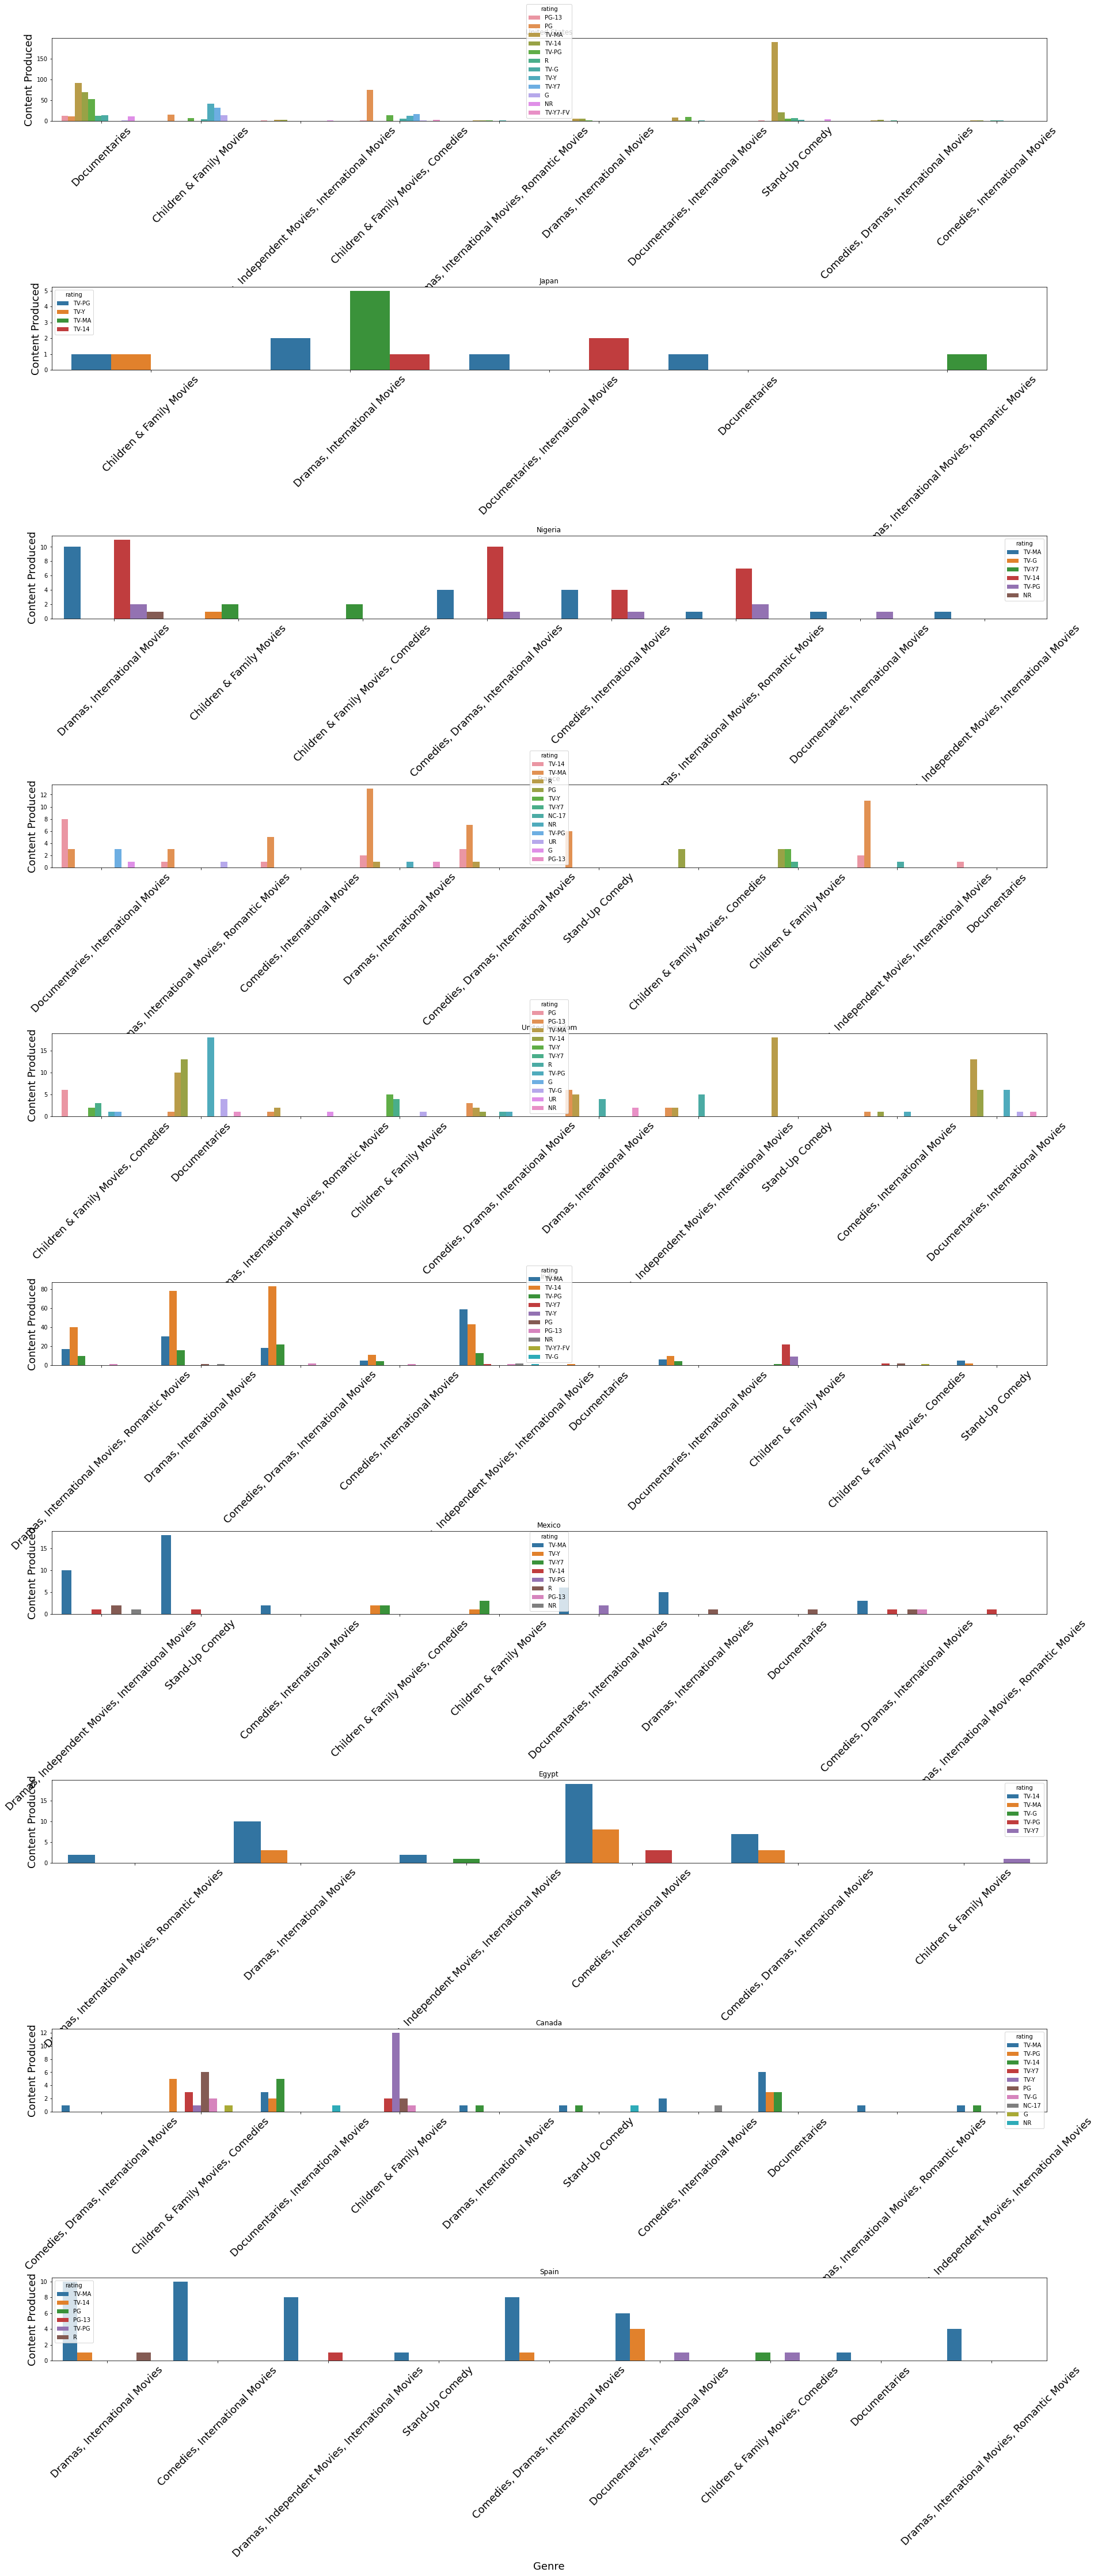

In [24]:
fig = plt.figure(
    figsize=(30,40)
    )

for i, name in enumerate(countries):
  frame = df[df['main_country'] == str(name)]
  ax = fig.add_subplot(len(countries),1,i+1)
  topic = name
  sns.countplot(x='listed_in', data= frame[frame['listed_in'].isin(listing)], hue='rating')
  ax.set_title(topic)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.5, 
                    hspace=2.0)
  plt.xlabel('Genre',fontsize=18)
  plt.xticks(rotation = 45,fontsize = 18)
  #ax.set(ylabel='Content Produced')
  ax.set_ylabel('Content Produced', fontsize = 18)

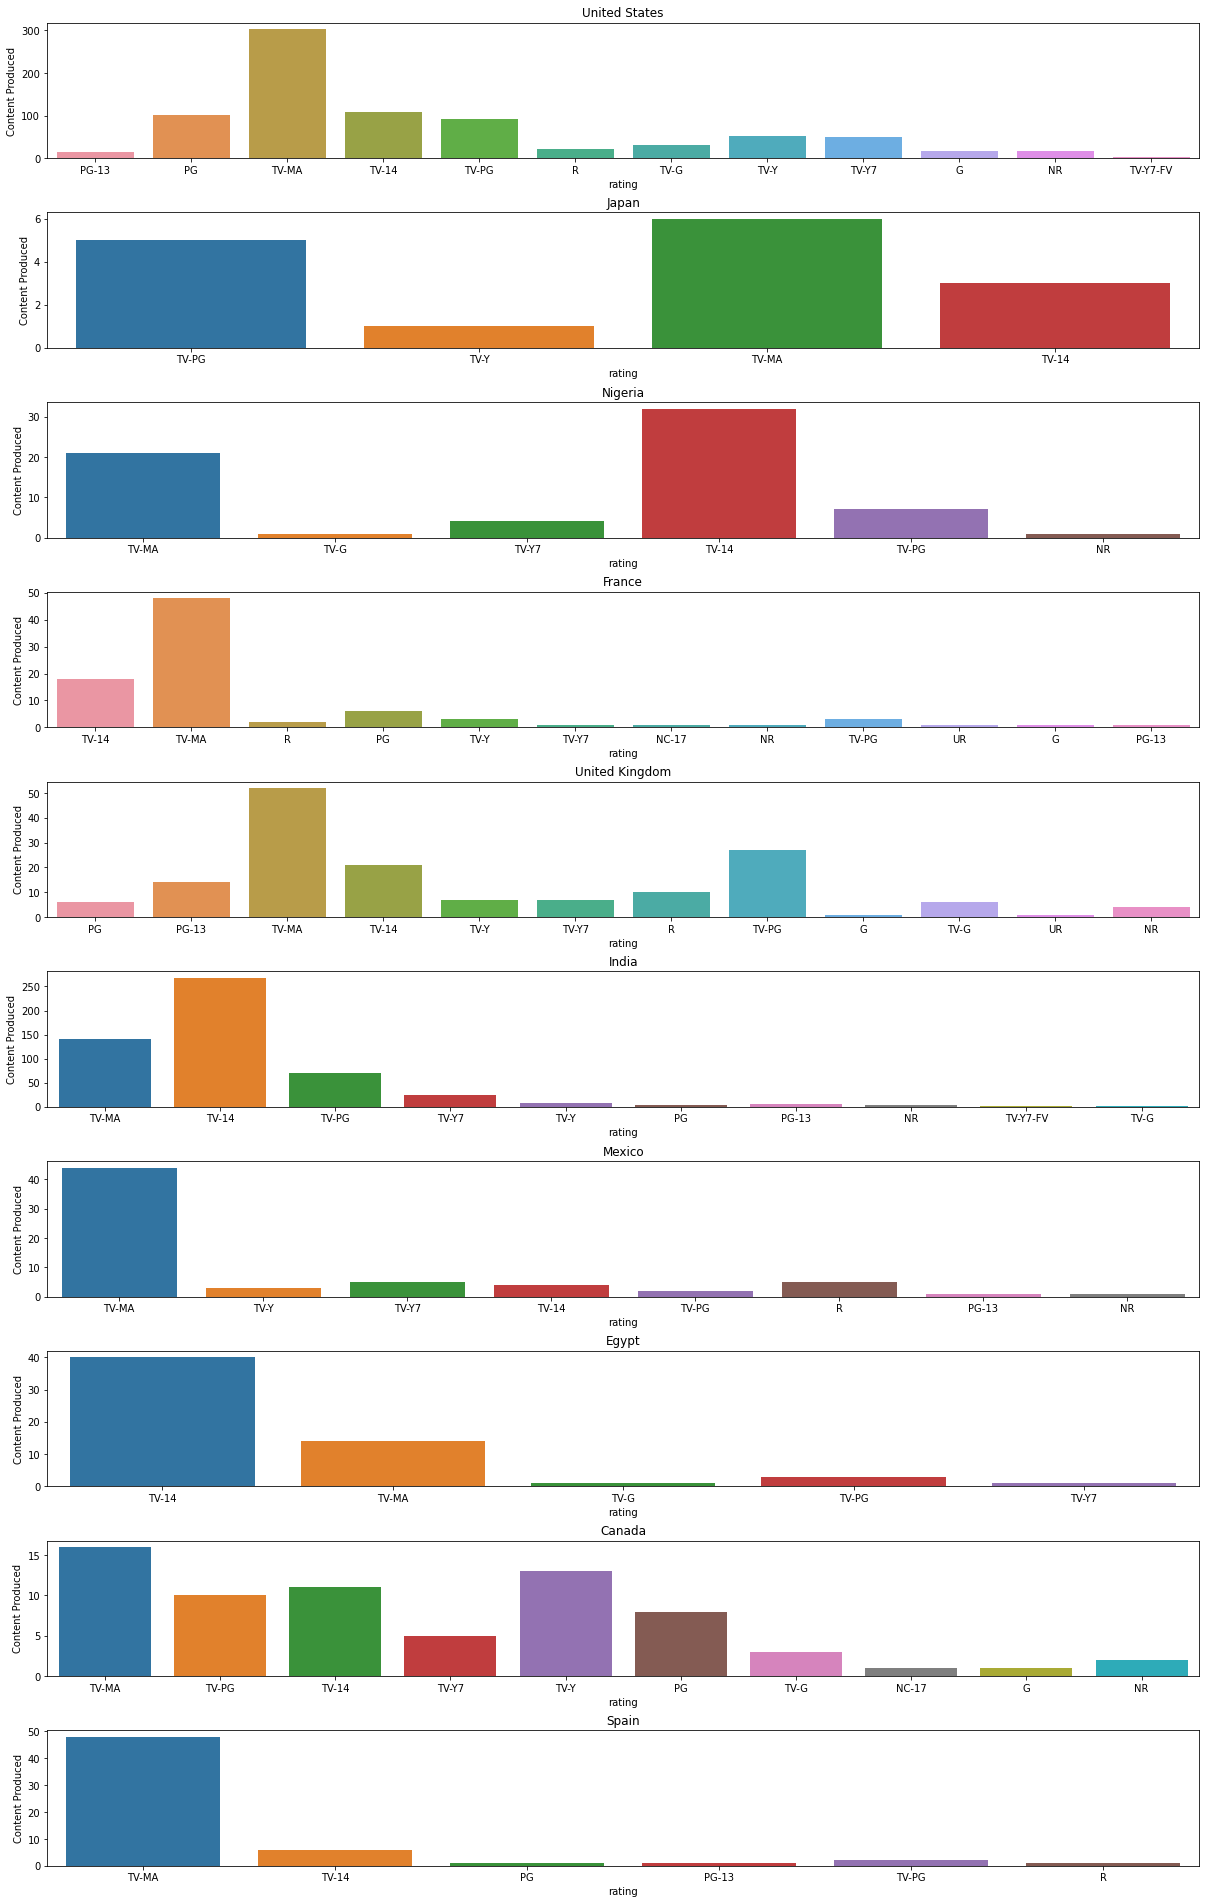

In [25]:
fig = plt.figure(
    figsize=(20,32)
    )

for i, name in enumerate(countries):
  frame = df[df['main_country'] == str(name)]
  ax = fig.add_subplot(len(countries),1,i+1)
  topic = name
  sns.countplot(x='rating', data= frame[frame['rating'].isin(ratings)])
  ax.set_title(topic)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  ax.set(ylabel='Content Produced')

### All the steps and analysis done for Movies is repeated for TV Shows as well so that we can draw the conclusions on a similar basis

# TV Show

In [26]:
df = data.copy()
df = df[df['type'] == 'TV Show']

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [27]:
df.drop(['director', 'cast'], axis=1, inplace=True)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [28]:
df[df['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
...,...,...,...,...,...,...,...,...,...,...
8679,s8680,TV Show,ViR: The Robot Boy,NaN,"March 31, 2018",2013,TV-Y7,2 Seasons,Kids' TV,Humanoid robot boy ViR lives with his inventor...
8690,s8691,TV Show,Wake Up,NaN,"March 31, 2018",2017,TV-14,2 Seasons,"International TV Shows, TV Dramas","After taking the blame for a patient death, an..."
8783,s8784,TV Show,Yoko,NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [29]:
df['country'] = df['country'].ffill(axis=0)
df[df['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


In [30]:
df[df['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."


In [31]:
ratings = ['TV-14', 'TV-MA']

for id, rating in zip(df[df['rating'].isnull()].index, ratings):
  df['rating'].loc[id] = rating

C:\Users\PARTHA\AppData\Local\Temp\ipykernel_3108\2877731943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'].loc[id] = rating


In [32]:
df[df['rating'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


In [33]:
df = df[df['date_added'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1 to 8803
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2666 non-null   object
 1   type          2666 non-null   object
 2   title         2666 non-null   object
 3   country       2666 non-null   object
 4   date_added    2666 non-null   object
 5   release_year  2666 non-null   int64 
 6   rating        2666 non-null   object
 7   duration      2666 non-null   object
 8   listed_in     2666 non-null   object
 9   description   2666 non-null   object
dtypes: int64(1), object(9)
memory usage: 229.1+ KB


In [34]:
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,main_country
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,South Africa
3,s4,TV Show,Jailbirds New Orleans,South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",South Africa
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India
5,s6,TV Show,Midnight Mass,India,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,India
...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,"Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,Japan
8796,s8797,TV Show,Yunus Emre,Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",Turkey
8797,s8798,TV Show,Zak Storm,"United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,United States
8800,s8801,TV Show,Zindagi Gulzar Hai,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",Pakistan


In [35]:
# For ease of analysis, let's pick top 10 countries with maximum content produced

top_countries = df.groupby('main_country').count().sort_values('type', ascending=False)[:10]
top_countries

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
main_country,,,,,,,,,,
United States,990,990,990,990,990,990,990,990,990,990
United Kingdom,281,281,281,281,281,281,281,281,281,281
South Korea,194,194,194,194,194,194,194,194,194,194
Japan,194,194,194,194,194,194,194,194,194,194
India,101,101,101,101,101,101,101,101,101,101
Canada,99,99,99,99,99,99,99,99,99,99
Taiwan,80,80,80,80,80,80,80,80,80,80
France,79,79,79,79,79,79,79,79,79,79
Australia,65,65,65,65,65,65,65,65,65,65


In [36]:
top_countries.index

Index(['United States', 'United Kingdom', 'South Korea', 'Japan', 'India',
       'Canada', 'Taiwan', 'France', 'Australia', 'Spain'],
      dtype='object', name='main_country')

In [37]:
# For ease of analysis, let's pick top 10 genres with maximum content produced

top_genres = df.groupby('listed_in').count().sort_values('type', ascending=False)[:10]
top_genres

,show_id,type,title,country,date_added,release_year,rating,duration,description,main_country
listed_in,,,,,,,,,,
Kids' TV,219,219,219,219,219,219,219,219,219,219
"International TV Shows, TV Dramas",121,121,121,121,121,121,121,121,121,121
"Crime TV Shows, International TV Shows, TV Dramas",110,110,110,110,110,110,110,110,110,110
"Kids' TV, TV Comedies",98,98,98,98,98,98,98,98,98,98
Reality TV,95,95,95,95,95,95,95,95,95,95
"International TV Shows, Romantic TV Shows, TV Comedies",94,94,94,94,94,94,94,94,94,94
"International TV Shows, Romantic TV Shows, TV Dramas",90,90,90,90,90,90,90,90,90,90
"Anime Series, International TV Shows",88,88,88,88,88,88,88,88,88,88
Docuseries,84,84,84,84,84,84,84,84,84,84


In [38]:
top_genres.index

Index(['Kids' TV', 'International TV Shows, TV Dramas',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Kids' TV, TV Comedies', 'Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'International TV Shows, Romantic TV Shows, TV Dramas',
       'Anime Series, International TV Shows', 'Docuseries', 'TV Comedies'],
      dtype='object', name='listed_in')

In [39]:
# Filtering the data for top 10 genres 
df = df[df['listed_in'].isin(list(top_genres.index))]

# Filtering the data for top 10 countries
df = df[df['main_country'].isin(list(top_countries.index))]

In [40]:
ratings = df['rating'].unique()

countries = df['main_country'].unique()

listing = df['listed_in'].unique()

ratings, countries, listing

(array(['TV-MA', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-14', 'TV-G'], dtype=object),
 array(['India', 'Australia', 'United Kingdom', 'United States', 'Japan',
        'France', 'South Korea', 'Taiwan', 'Canada', 'Spain'], dtype=object),
 array(['International TV Shows, Romantic TV Shows, TV Comedies',
        'TV Comedies', "Kids' TV", 'Reality TV', "Kids' TV, TV Comedies",
        'International TV Shows, TV Dramas',
        'Anime Series, International TV Shows', 'Docuseries',
        'Crime TV Shows, International TV Shows, TV Dramas',
        'International TV Shows, Romantic TV Shows, TV Dramas'],
       dtype=object))

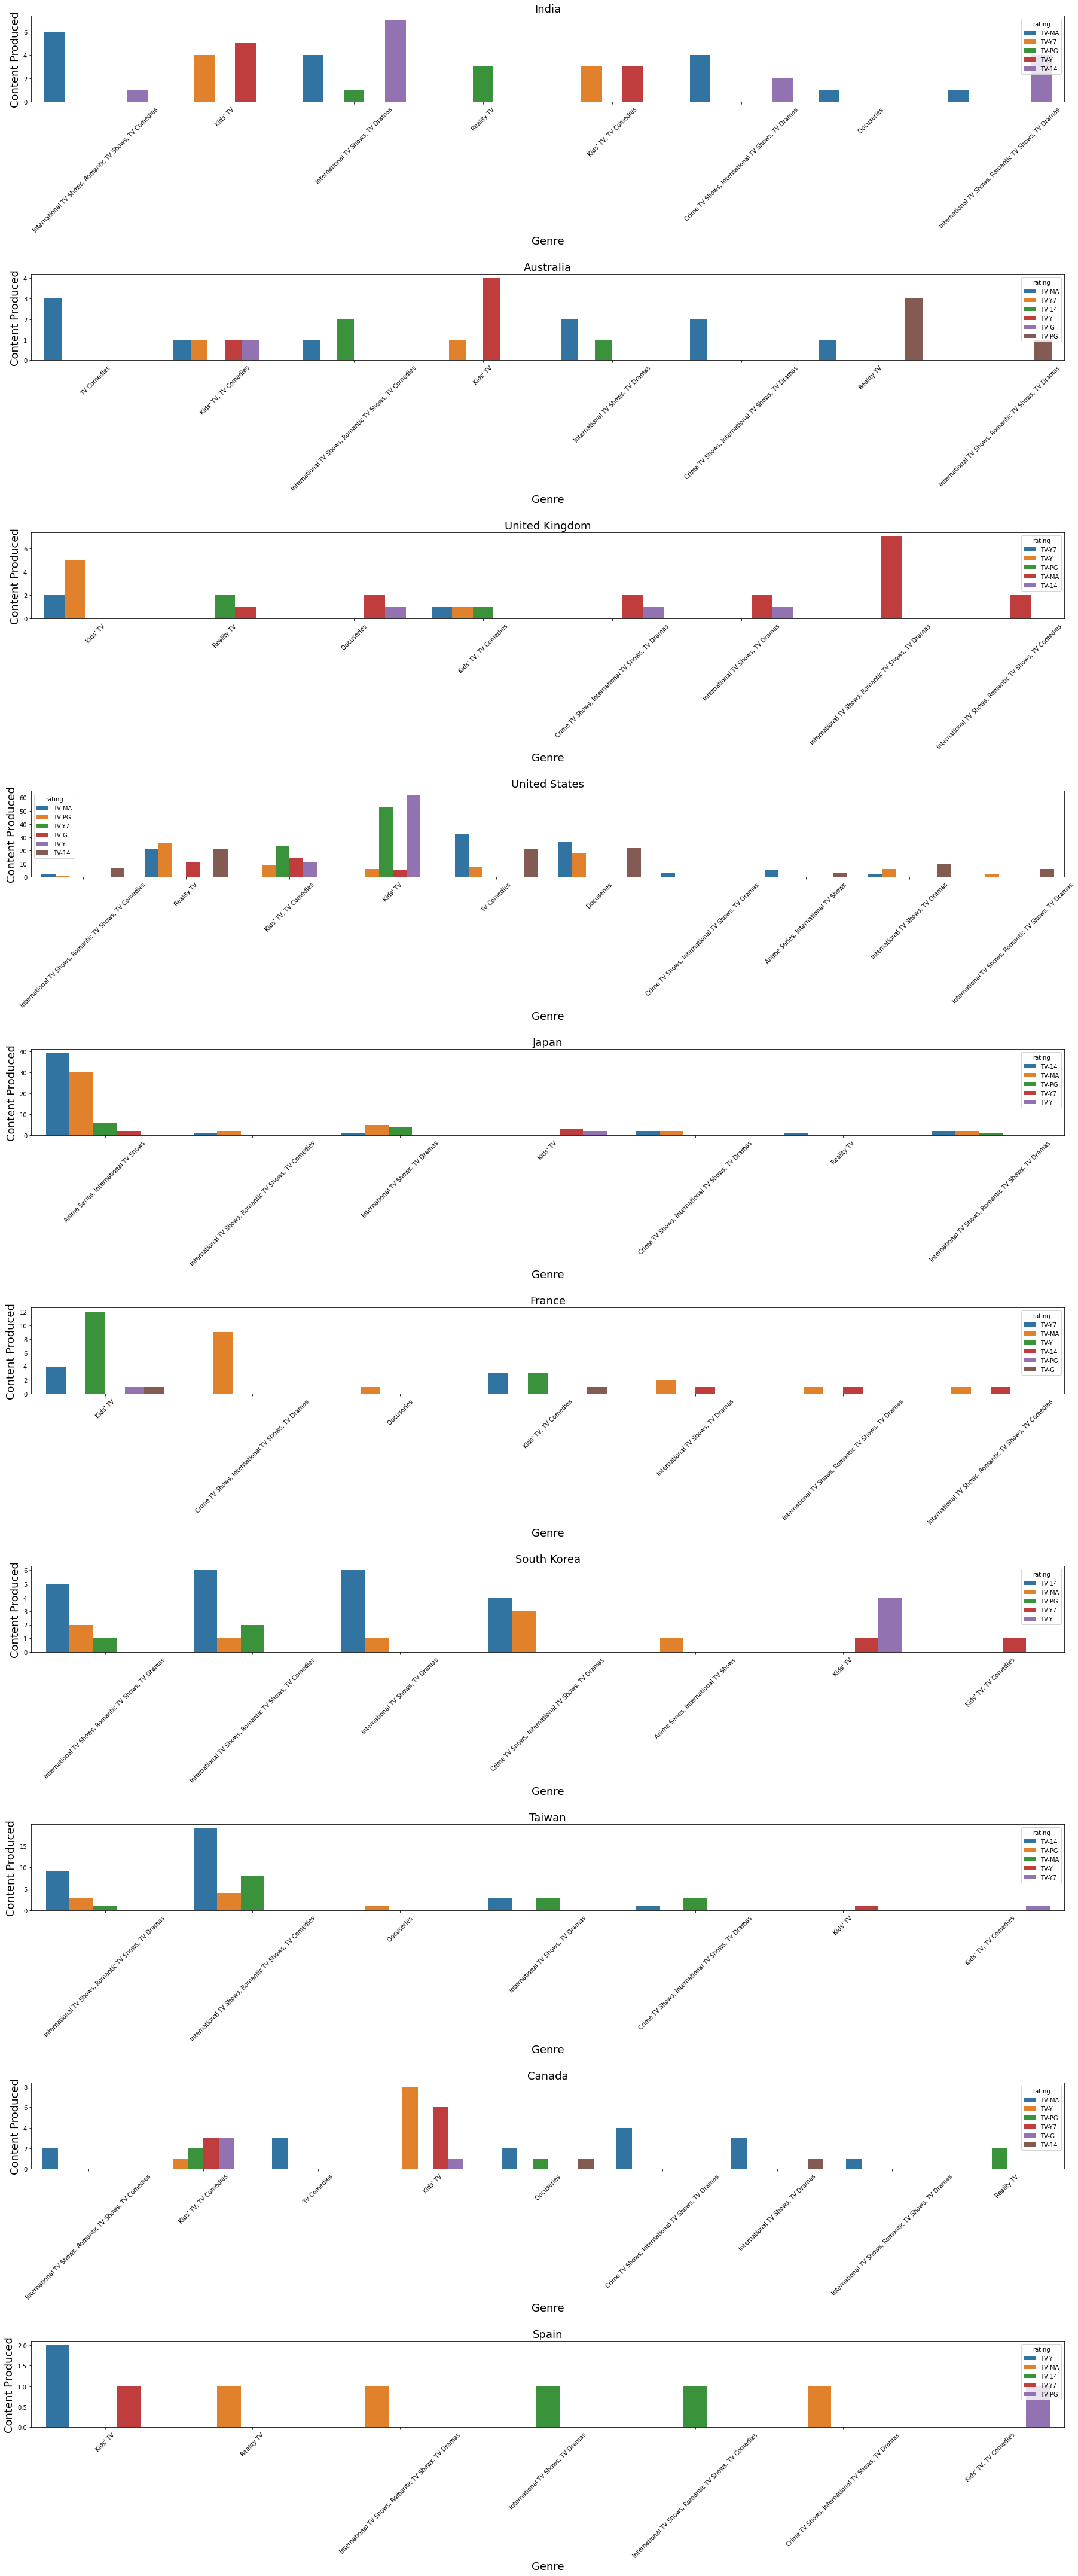

In [41]:
fig = plt.figure(
    figsize=(30,40)
    )

for i, name in enumerate(countries):
  frame = df[df['main_country'] == str(name)]
  ax = fig.add_subplot(len(countries),1,i+1)
  topic = name
  sns.countplot(x='listed_in', data= frame[frame['listed_in'].isin(listing)], hue='rating')
  plt.title(topic, fontsize = 18)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.5, 
                    hspace=2.0)
  plt.xlabel('Genre', fontsize = 18)
  plt.xticks(rotation = 45)
  plt.ylabel('Content Produced', fontsize = 18)

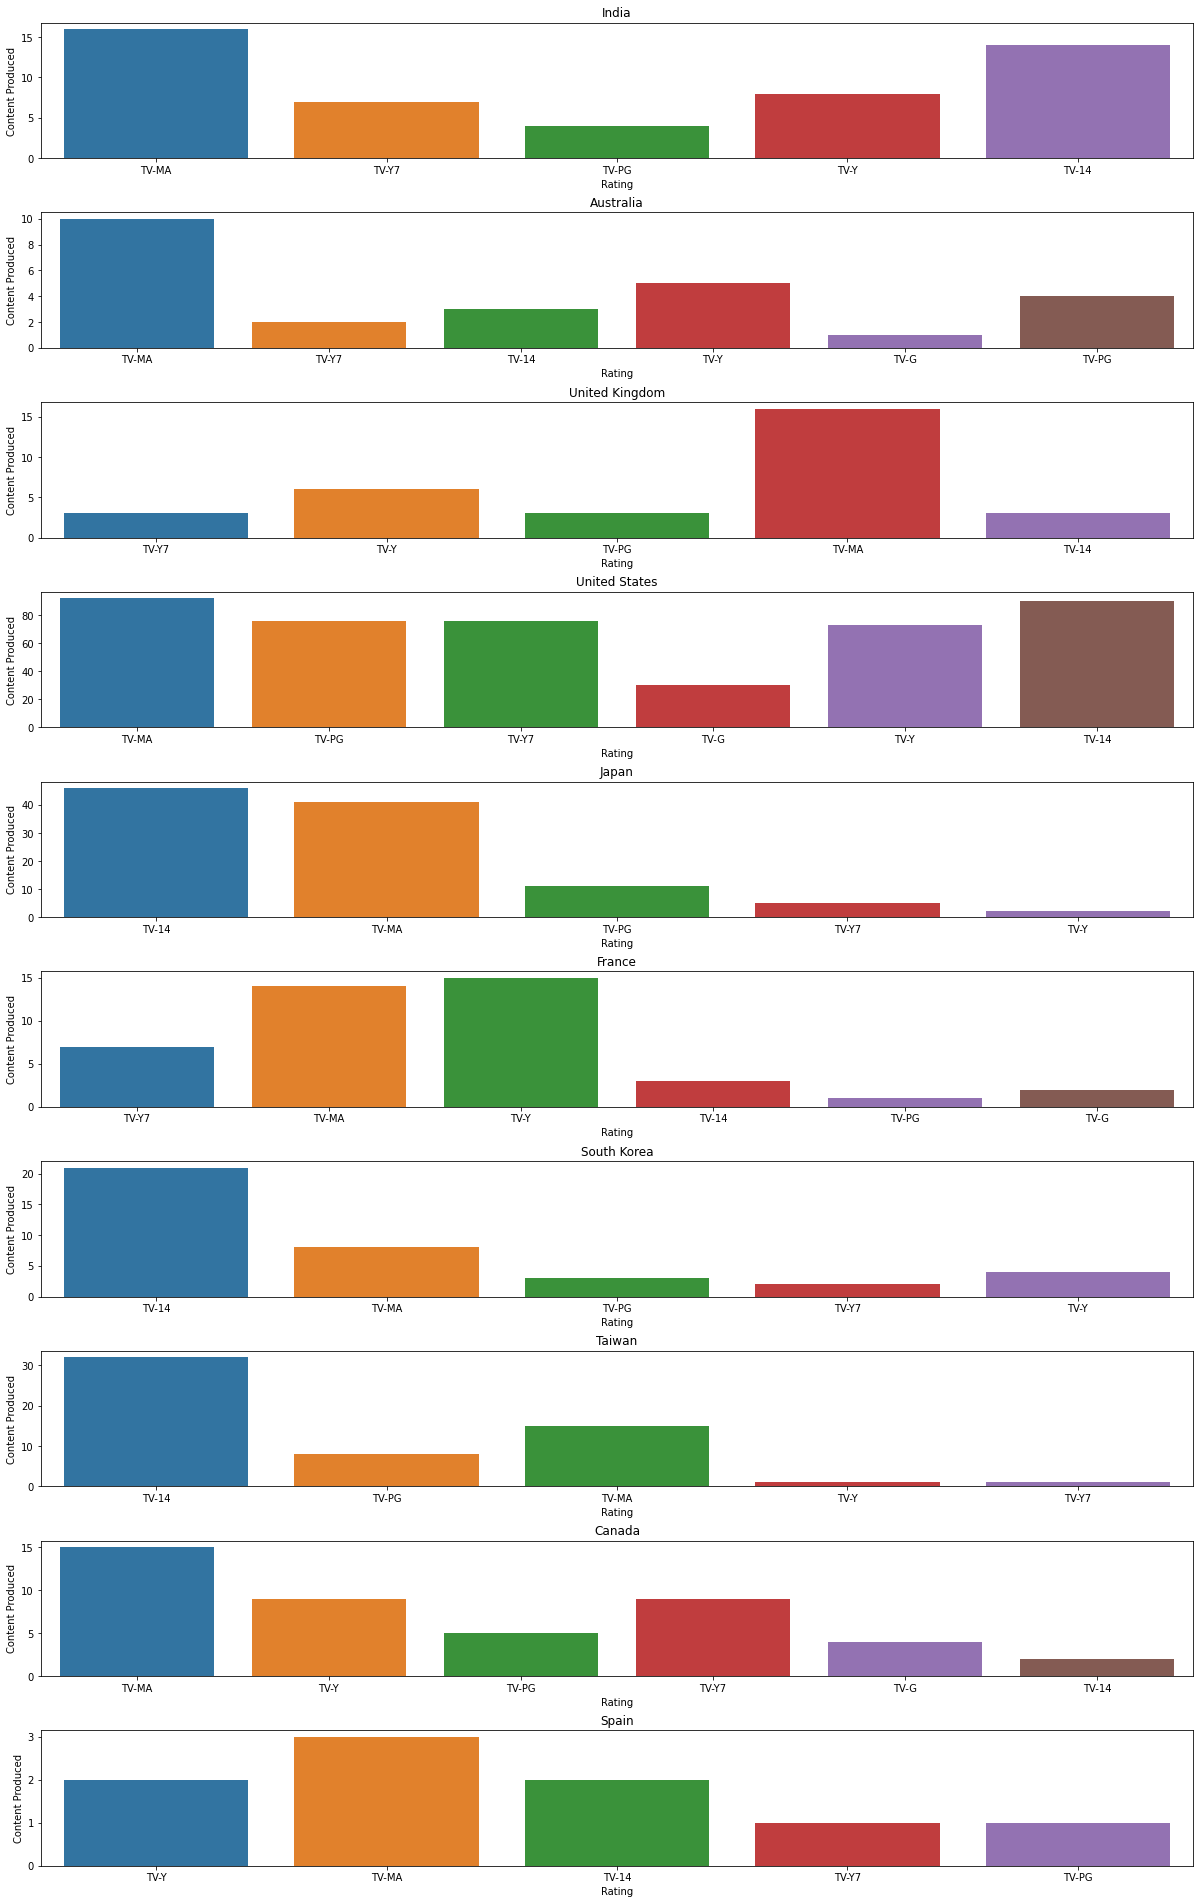

In [42]:
fig = plt.figure(
    figsize=(20,32)
    )

for i, name in enumerate(countries):
  frame = df[df['main_country'] == str(name)]
  ax = fig.add_subplot(len(countries),1,i+1)
  topic = name
  sns.countplot(x='rating', data= frame[frame['rating'].isin(ratings)])
  ax.set_title(topic)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  plt.xlabel('Rating')
  ax.set(ylabel='Content Produced')